<a href="https://colab.research.google.com/github/MacedoDesu/Projeto-Pos-Aprendizado-da-Maquina-Cardiovascular/blob/main/Projeto_Pos_Aprendizado_da_Maquina_Cardiovascular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4517 - loss: 0.7365 - precision: 0.3184 - val_accuracy: 0.4565 - val_loss: 0.7652 - val_precision: 0.5000
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5970 - loss: 0.6985 - precision: 0.5429 - val_accuracy: 0.6087 - val_loss: 0.7094 - val_precision: 0.7333
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6494 - loss: 0.6817 - precision: 0.5732 - val_accuracy: 0.6739 - val_loss: 0.6724 - val_precision: 0.7778
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7179 - loss: 0.6525 - precision: 0.6738 - val_accuracy: 0.7609 - val_loss: 0.6402 - val_precision: 0.8182
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7654 - loss: 0.6113 - precision: 0.7873 - val_accuracy: 0.8043 - val_loss: 0.6128 - val_precision: 0.8333
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7704 - loss: 0.5958 - precision: 0.7366 - val_accuracy: 0.8043 - val_loss: 0.5889 - val_precisio

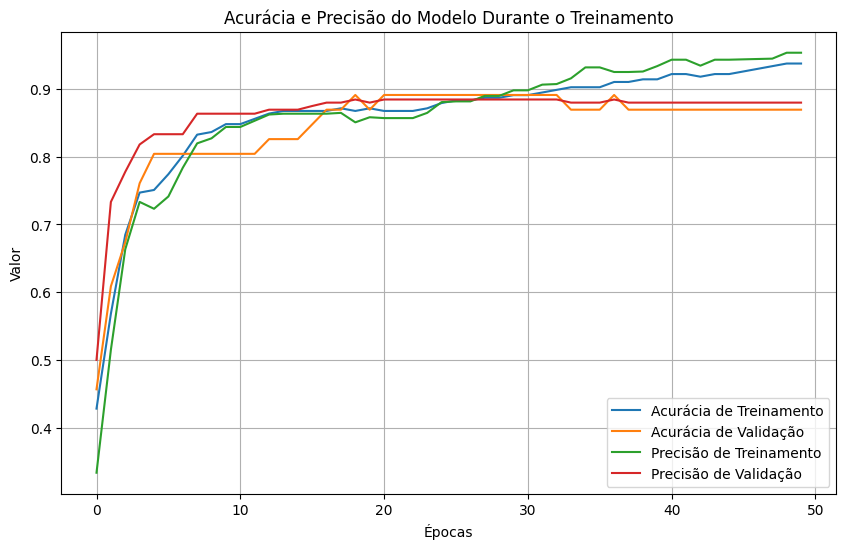

In [ ]:
import zipfile
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision
import matplotlib.pyplot as plt
import seaborn as sns

#Caminho do arquivo ZIP
zip_path = "/content/heart+disease.zip"
extract_path = "/mnt/data/heart_disease_data"

#Listar arquivos dentro do ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_list = zip_ref.namelist()
    zip_ref.extractall(extract_path)  # Extraindo os arquivos

file_list

#Carregar o arquivo sem cabeçalhos
file_path = "/mnt/data/heart_disease_data/processed.cleveland.data"
df = pd.read_csv(file_path, header=None)

colunas = ["idade", "sexo", "dor_peito", "PA_rep", "Col_serico", "ASJ", "ECG_rep",
           "MFC", "AINEX", "DEPSTEX", "INCLI", "CA", "TAL", "NUM"]
df = pd.read_csv(file_path, names=colunas, header=None)

#Converter a saída para binária (0 = saudável, 1 = doente)
df["NUM"] = df["NUM"].apply(lambda x: 1 if x > 0 else 0)

#Separar features e target
X = df.drop('NUM', axis=1).copy()  # Removendo a coluna alvo
y = df["NUM"].copy()  # Alvo

#One-hot encoding para variáveis categóricas
categorical_features = ["sexo", "dor_peito", "ASJ", "ECG_rep", "AINEX", "INCLI", "CA", "TAL"]
X = pd.get_dummies(X, columns=categorical_features)

#Normaliza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

#Criar o modelo da rede neural
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Compilar o modelo com a precisão como métrica adicional
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision'])

#Treinar o modelo e capturar o histórico de treinamento
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

#Avaliar a precisão do modelo
loss, accuracy, precision = model.evaluate(X_test, y_test)
print(f"Acurácia da rede neural: {accuracy:.4f}")
print(f"Precisão da rede neural: {precision:.4f}")

#Plotando os resultados de precisão e acurácia (Training vs Validation)
plt.figure(figsize=(10, 6))

#Plotando acurácia
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')

#Plotando precisão
plt.plot(history.history['precision'], label='Precisão de Treinamento')
plt.plot(history.history['val_precision'], label='Precisão de Validação')

plt.title('Acurácia e Precisão do Modelo Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()